# 🔍 Overview  

K-Nearest Neighbors (KNN) is one of the fundamental algorithms in **machine learning** used for **classification and regression problems**. Unlike Logistic Regression, which models probabilities, KNN is a **non-parametric, instance-based algorithm** that makes predictions based on the similarity of data points. It classifies a new data point by looking at the majority class among its **k nearest neighbors**.  

### 💡 **Why use K-Nearest Neighbors?**  
- **Simple and intuitive** – no explicit training phase, just store the data.  
- **Flexible** – can be used for both **classification** and **regression** tasks.  
- **Works well with non-linear decision boundaries**.  
- **Handles multi-class classification** naturally.  
- **No assumptions about data distribution** – purely data-driven.  

### ⚡ **Common Applications of K-Nearest Neighbors:**  
- **Recommendation Systems** 📺 (e.g., suggesting movies based on similar users' preferences).  
- **Anomaly Detection** ⚠️ (e.g., identifying fraudulent transactions in banking).  
- **Medical Diagnosis** 🏥 (e.g., classifying tumors as malignant or benign).  
- **Handwritten Digit Recognition** ✍️ (e.g., OCR systems like digit recognition in postal mail).  
- **Customer Segmentation** 🎯 (e.g., grouping users by purchasing behavior).  

#📌 **The K-Nearest Neighbors Formula:**  

$$
y = \frac{1}{k} \sum_{i=1}^{k} y_i
$$
Where:  
✔ ( \( y \) ) **(Predicted Value)** → The predicted class (classification) or averaged value (regression) based on the nearest neighbors.  
✔ ( \( k \) ) **(Number of Neighbors)** → The number of closest data points considered for making predictions.  
✔ ( \( y_i \) ) **(Labels of Neighbors)** → The target values (or class labels) of the k nearest neighbors.  
✔ ( \( d(x, x_i) \) ) **(Distance Function)** → The metric used to measure similarity between points (e.g., Euclidean, Manhattan, Minkowski).  

⚠ **Choosing \( k \) Wisely:**  
- **Small \( k \)** → More sensitive to noise but captures local structure.  
- **Large \( k \)** → Smoother decision boundary but may lose finer details.  

🔑 **Key Insight:**  
- **KNN is a simple yet powerful algorithm** used for **classification and regression**.  
- **Lazy learning** – No training phase; all computations happen during prediction.  
- **Works well with non-linear decision boundaries** and high-dimensional data.  
- **Distance-based approach** makes it highly dependent on feature scaling (e.g., normalization).  
- **Versatile** – Can be used for image recognition, recommendation systems, and anomaly detection.  

💡 **KNN is easy to implement and interpret, making it a great choice for pattern recognition tasks!** 🚀  

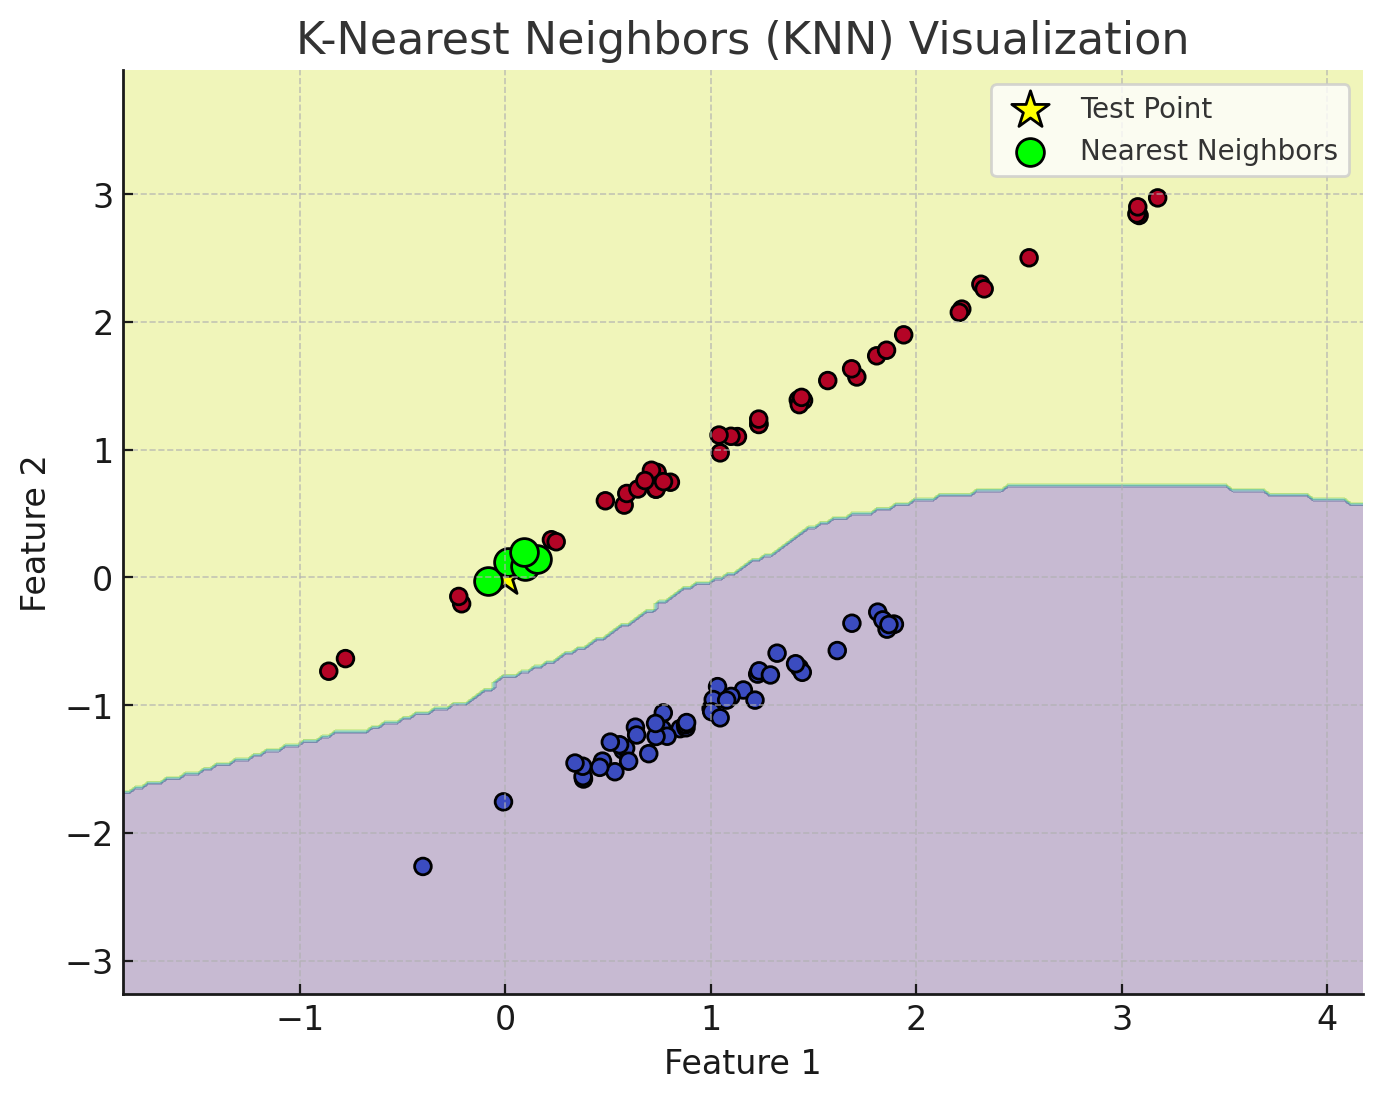

# 📌 Importing Libraries

In [46]:
# 📊 Import necessary libraries
import numpy as np  # Library for numerical operations
import pandas as pd  # Library for handling data in tabular format
import matplotlib.pyplot as plt  # Library for creating visualizations
import seaborn as sns  # Library for advanced data visualizations

# 🤖🤖🤖 Import machine learning modules
from sklearn.model_selection import train_test_split, cross_val_score  # Splitting data and cross-validation
from sklearn.preprocessing import StandardScaler  # Standardization of features for better performance
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors (KNN) classifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier  # Gradient Boosting & Random Forest models
from sklearn.model_selection import GridSearchCV  # Hyperparameter tuning for model optimization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix  # Model evaluation metrics

#📥 Load dataset

In [47]:
# 📥 Load dataset
file_path = "Social_Network_Ads.csv"  # Path to the dataset file
df = pd.read_csv(file_path)  # Read CSV file into a Pandas DataFrame
print("Dataset Loaded Successfully! ✅")  # Print confirmation message
print(df.head())  # Display first 5 rows of the dataset

Dataset Loaded Successfully! ✅
   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


#📊 Visualize feature correlation

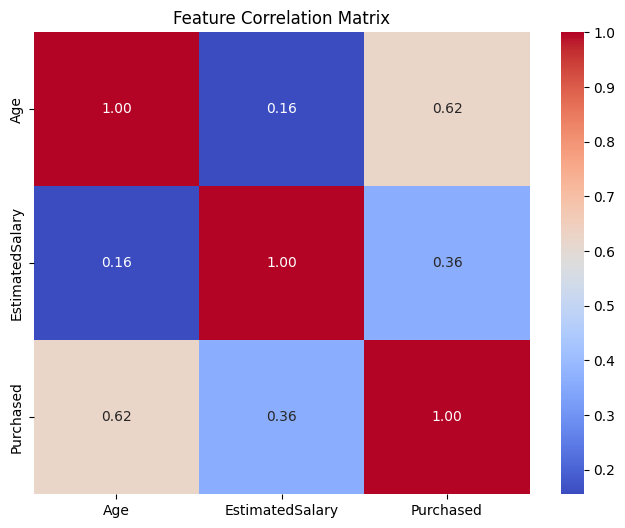

In [48]:
# 📊 Visualizing feature correlations
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")  # Generate heatmap to visualize feature correlations
plt.title("Feature Correlation Matrix")  # Set the title for the heatmap
plt.show()  # Display the heatmap

#📊 Prepare data for training

In [49]:
# 📊 Prepare data for training
target_column = df.columns[-1]  # Automatically detect the target column (last column)
X = df.drop(columns=[target_column]).values  # Select all columns except the target as features
y = df[target_column].values  # Select the target column as labels

# Split dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature values for better performance
scaler = StandardScaler()  # Initialize standard scaler
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_test = scaler.transform(X_test)  # Transform testing data using the fitted scaler

# 🤖 Hyperparameter tuning

In [63]:
# 🤖🤖🤖 Initialize models
knn = KNeighborsClassifier(n_neighbors=7)  # K-Nearest Neighbors with 5 neighbors
gb = GradientBoostingClassifier(n_estimators=200, random_state=42)  # Gradient Boosting with 100 estimators
rf = RandomForestClassifier(n_estimators=200, random_state=42)  # Random Forest with 100 estimators

#🤖 Hyperparameter tuning 🤖 Hyperparameter tuning

In [68]:
# 📌 Define hyperparameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting of neighbors
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# 📌 Define hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7]  # Maximum depth of each tree
}

# 📌 Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required at a leaf node
}

# 🤖🤖🤖  SUPER TUNING!!! 🤖 🤖 🤖

In [69]:
from sklearn.model_selection import GridSearchCV

# 🔥 Define hyperparameter grid for Gradient Boosting
gb_param_grid = {
    "n_estimators": [100, 200, 300],  # Number of boosting stages
    "learning_rate": [0.01, 0.05, 0.1, 0.2],  # Controls step size at each iteration
    "max_depth": [3, 4, 5],  # Maximum depth of trees
    "subsample": [0.8, 1.0],  # Fraction of samples used for fitting trees
    "min_samples_split": [2, 5],  # Minimum samples required to split a node
    "min_samples_leaf": [1, 3, 5]  # Minimum samples required per leaf
}

# 🚀 Run GridSearchCV for Gradient Boosting
gb_grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=gb_param_grid,
    cv=5,  # 5-Fold cross-validation
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

print("\n⏳ Tuning Gradient Boosting...")
gb_grid_search.fit(X_train, y_train)

# 📢 Print the best parameters for Gradient Boosting
print("\n🔍 Best Hyperparameters for Gradient Boosting:")
print(gb_grid_search.best_params_)

# 🎯 Store the best GB model
gb_best = gb_grid_search.best_estimator_

# 🔥 Define hyperparameter grid for Random Forest
rf_param_grid = {
    "n_estimators": [100, 200, 300],  # Number of trees
    "max_depth": [None, 10, 20],  # Maximum depth of trees
    "min_samples_split": [2, 5, 10],  # Minimum samples required to split a node
    "min_samples_leaf": [1, 2, 4],  # Minimum samples required per leaf
    "bootstrap": [True, False]  # Whether to use bootstrapping
}

# 🚀 Run GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    cv=5,  # 5-Fold cross-validation
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

print("\n⏳ Tuning Random Forest...")
rf_grid_search.fit(X_train, y_train)

# 📢 Print the best parameters for Random Forest
print("\n🔍 Best Hyperparameters for Random Forest:")
print(rf_grid_search.best_params_)

# 🎯 Store the best RF model
rf_best = rf_grid_search.best_estimator_


⏳ Tuning Gradient Boosting...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits

🔍 Best Hyperparameters for Gradient Boosting:
{'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 1.0}

⏳ Tuning Random Forest...
Fitting 5 folds for each of 162 candidates, totalling 810 fits

🔍 Best Hyperparameters for Random Forest:
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [70]:
# 🎯 Use the best models after hyperparameter tuning
gb = gb_best  # Optimized Gradient Boosting
rf = rf_best  # Optimized Random Forest

#🤖 AUTOTUNE  🤖 🤖  GRID_SearchCV 🤖 🤖 🤖

In [52]:
# 🤖🤖🤖🤖🤖🤖🤖🤖🤖   🤖🤖🤖🤖🤖🤖🤖🤖🤖   🤖🤖🤖🤖🤖🤖🤖🤖🤖  🤖🤖🤖🤖🤖🤖🤖🤖🤖

# 📌 Import GridSearchCV
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV for hyperparameter tuning

# 🎯 Perform GridSearchCV for KNN
grid_knn = GridSearchCV(
    KNeighborsClassifier(),  # Use K-Nearest Neighbors classifier
    param_grid_knn,  # Pass the predefined hyperparameter grid for tuning
    cv=5,  # Use 5-fold cross-validation for more reliable results
    scoring='accuracy',  # Optimize for accuracy score
    n_jobs=-1  # Utilize all available CPU cores for parallel computation
)
grid_knn.fit(X_train, y_train)  # Train the KNN model with GridSearchCV to find the best parameters

# 🎯 Perform GridSearchCV for Gradient Boosting
grid_gb = GridSearchCV(
    GradientBoostingClassifier(random_state=42),  # Use Gradient Boosting classifier with fixed random state
    param_grid_gb,  # Use the predefined hyperparameter grid for tuning
    cv=5,  # Apply 5-fold cross-validation to ensure robustness
    scoring='accuracy',  # Optimize for accuracy score
    n_jobs=-1  # Utilize all CPU cores for parallel processing
)
grid_gb.fit(X_train, y_train)  # Train the Gradient Boosting model with GridSearchCV to find the best parameters

# 🎯 Perform GridSearchCV for Random Forest
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),  # Use Random Forest classifier with fixed random state
    param_grid_rf,  # Use the predefined hyperparameter grid for tuning
    cv=5,  # Apply 5-fold cross-validation to increase reliability
    scoring='accuracy',  # Optimize for accuracy score
    n_jobs=-1  # Run parallel computations using all CPU cores
)
grid_rf.fit(X_train, y_train)  # Train the Random Forest model with GridSearchCV to find the best parameters

# 📢 Print the best hyperparameters found
print("\n🏆 Best Hyperparameters Found:")  # Print a title for better readability
print(f"KNN: {grid_knn.best_params_}")  # Display the best hyperparameters found for KNN
print(f"Gradient Boosting: {grid_gb.best_params_}")  # Display the best hyperparameters found for Gradient Boosting
print(f"Random Forest: {grid_rf.best_params_}")  # Display the best hyperparameters found for Random Forest


🏆 Best Hyperparameters Found:
KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


#🤖 Train models

In [71]:
#🤖🤖🤖 Train models on the training dataset
knn.fit(X_train, y_train)  # Train KNN model
gb.fit(X_train, y_train)  # Train Gradient Boosting model
rf.fit(X_train, y_train)  # Train Random Forest model

RandomForestClassifier(bootstrap=False, min_samples_leaf=2, random_state=42)

#🎯 Make predictions

In [72]:
# 🎯 Make predictions using trained models
y_pred_knn = knn.predict(X_test)  # Predictions using KNN
y_pred_gb = gb.predict(X_test)  # Predictions using Gradient Boosting
y_pred_rf = rf.predict(X_test)  # Predictions using Random Forest

#📊 Feature Importance

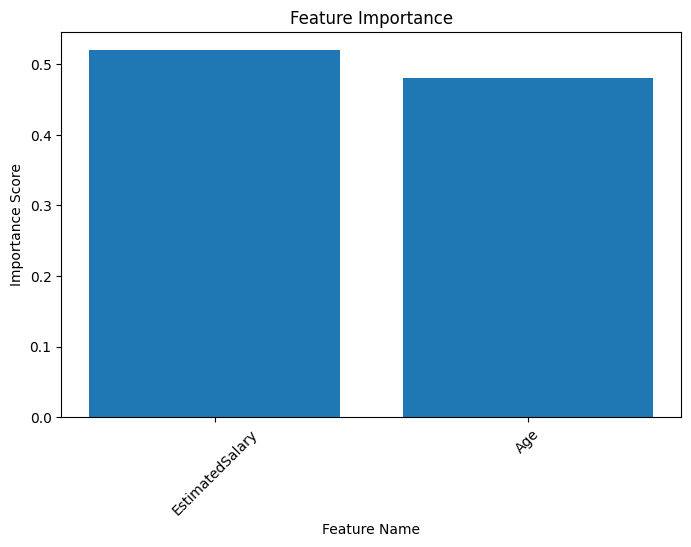

In [55]:
# 📊 Feature Importance (for Random Forest)
importances = rf.feature_importances_  # Extract feature importance values
indices = np.argsort(importances)[::-1]  # Sort features by importance

plt.figure(figsize=(8, 5))  # Set figure size
plt.title("Feature Importance")  # Set title
plt.bar(range(len(df.columns) - 1), importances[indices], align="center")  # Plot feature importances
plt.xticks(range(len(df.columns) - 1), np.array(df.columns[:-1])[indices], rotation=45)  # Set feature labels
plt.xlabel("Feature Name")  # Label x-axis
plt.ylabel("Importance Score")  # Label y-axis
plt.show()  # Display plot


#📊 Cross-validation scores

In [73]:
# 📊 Cross-validation scores
cv_knn = cross_val_score(KNeighborsClassifier(n_neighbors=5), X, y, cv=5).mean()  # Cross-validation for KNN
cv_gb = cross_val_score(GradientBoostingClassifier(n_estimators=100, random_state=42), X, y, cv=5).mean()  # Cross-validation for GB
cv_rf = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X, y, cv=5).mean()  # Cross-validation for RF


#📊 Model performance metrics

In [74]:
# 📊 Model performance metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)  # Accuracy of KNN
accuracy_gb = accuracy_score(y_test, y_pred_gb)  # Accuracy of GB
accuracy_rf = accuracy_score(y_test, y_pred_rf)  # Accuracy of RF

precision_knn = precision_score(y_test, y_pred_knn)  # Precision of KNN
precision_gb = precision_score(y_test, y_pred_gb)  # Precision of GB
precision_rf = precision_score(y_test, y_pred_rf)  # Precision of RF

recall_knn = recall_score(y_test, y_pred_knn)  # Recall of KNN
recall_gb = recall_score(y_test, y_pred_gb)  # Recall of GB
recall_rf = recall_score(y_test, y_pred_rf)  # Recall of RF

f1_knn = f1_score(y_test, y_pred_knn)  # F1-score of KNN
f1_gb = f1_score(y_test, y_pred_gb)  # F1-score of GB
f1_rf = f1_score(y_test, y_pred_rf)  # F1-score of RF

roc_auc_knn = roc_auc_score(y_test, y_pred_knn)  # ROC-AUC of KNN
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)  # ROC-AUC of GB
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)  # ROC-AUC of RF

# 📢 Print summary of model performance
print("\n===== Model Performance Summary =====")
print(f"KNN -> Accuracy: {accuracy_knn:.4f}, Precision: {precision_knn:.4f}, Recall: {recall_knn:.4f}, F1: {f1_knn:.4f}, ROC-AUC: {roc_auc_knn:.4f}")
print(f"GB  -> Accuracy: {accuracy_gb:.4f}, Precision: {precision_gb:.4f}, Recall: {recall_gb:.4f}, F1: {f1_gb:.4f}, ROC-AUC: {roc_auc_gb:.4f}")
print(f"RF  -> Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1: {f1_rf:.4f}, ROC-AUC: {roc_auc_rf:.4f}")

print("\n===== Cross-Validation Accuracy =====")
print(f"KNN: {cv_knn:.4f}, GB: {cv_gb:.4f}, RF: {cv_rf:.4f}")


===== Model Performance Summary =====
KNN -> Accuracy: 0.9417, Precision: 0.9000, Recall: 0.9574, F1: 0.9278, ROC-AUC: 0.9445
GB  -> Accuracy: 0.9250, Precision: 0.9318, Recall: 0.8723, F1: 0.9011, ROC-AUC: 0.9156
RF  -> Accuracy: 0.9083, Precision: 0.8913, Recall: 0.8723, F1: 0.8817, ROC-AUC: 0.9019

===== Cross-Validation Accuracy =====
KNN: 0.7675, GB: 0.8525, RF: 0.8600


# 🔥 🔧 cross-validation

In [75]:
from sklearn.model_selection import cross_val_score  # Import cross-validation function
import numpy as np  # Import NumPy for numerical operations

# 🔧 Set the number of folds for cross-validation
cv_folds = 45  # Increasing to 10 folds for more stable results

# 📊 Perform cross-validation for each model
cv_knn = np.mean(cross_val_score(knn, X, y, cv=cv_folds, scoring='accuracy'))  # KNN model cross-validation
cv_gb = np.mean(cross_val_score(gb, X, y, cv=cv_folds, scoring='accuracy'))    # Gradient Boosting cross-validation
cv_rf = np.mean(cross_val_score(rf, X, y, cv=cv_folds, scoring='accuracy'))    # Random Forest cross-validation

# 📢 Print updated cross-validation results
print(f"\n===== Cross-Validation Accuracy (cv={cv_folds}) =====")  # Title for better readability
print(f"KNN: {cv_knn:.4f}, GB: {cv_gb:.4f}, RF: {cv_rf:.4f}")  # Display accuracy scores for all models



===== Cross-Validation Accuracy (cv=45) =====
KNN: 0.7954, GB: 0.9080, RF: 0.8935


#📊🔍 Advanced Model Comparison - Visualizing Performance Metrics

<ipython-input-77-430d75c5adbc>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=models, palette="viridis")  # Create barplot with color theme
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


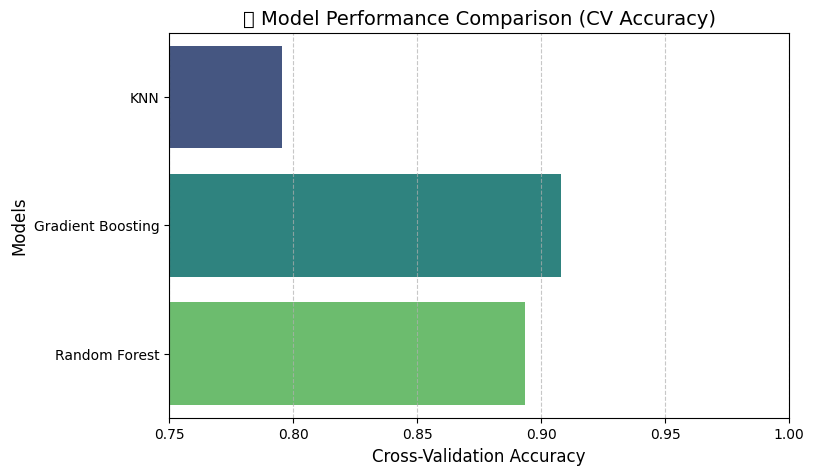


🏆 Best Model Based on Cross-Validation: Gradient Boosting with Accuracy: 0.9080


In [77]:
# 📊🔍 Advanced Model Comparison - Visualizing Performance Metrics

import matplotlib.pyplot as plt  # Import Matplotlib for visualization
import seaborn as sns  # Import Seaborn for better plots

# 🎯 Create a dictionary to store accuracy from cross-validation
cv_results = {
    "KNN": cv_knn,
    "Gradient Boosting": cv_gb,
    "Random Forest": cv_rf
}

# 🔥 Convert dictionary to sorted lists for plotting
models = list(cv_results.keys())  # Extract model names
scores = list(cv_results.values())  # Extract accuracy scores

# 🎨 Plot cross-validation accuracy for each model
plt.figure(figsize=(8, 5))  # Set figure size
sns.barplot(x=scores, y=models, palette="viridis")  # Create barplot with color theme
plt.xlabel("Cross-Validation Accuracy", fontsize=12)  # Set x-axis label
plt.ylabel("Models", fontsize=12)  # Set y-axis label
plt.title("📊 Model Performance Comparison (CV Accuracy)", fontsize=14)  # Set plot title
plt.xlim(0.75, 1.0)  # Adjust x-axis range for better visualization
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Add grid for readability
plt.show()  # Display the plot

# 🔥 Print the best model based on CV score
best_model = max(cv_results, key=cv_results.get)  # Find the model with the highest accuracy
print(f"\n🏆 Best Model Based on Cross-Validation: {best_model} with Accuracy: {cv_results[best_model]:.4f}")
